<a href="https://colab.research.google.com/github/Madydonis/Colab/blob/main/Regresiones_Log%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresiones Logisticas



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv("diabetes.csv")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Verificacion de valores nulos

In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Verificacion si el Dataset esta desbalanceado

<Axes: xlabel='Outcome', ylabel='Count'>

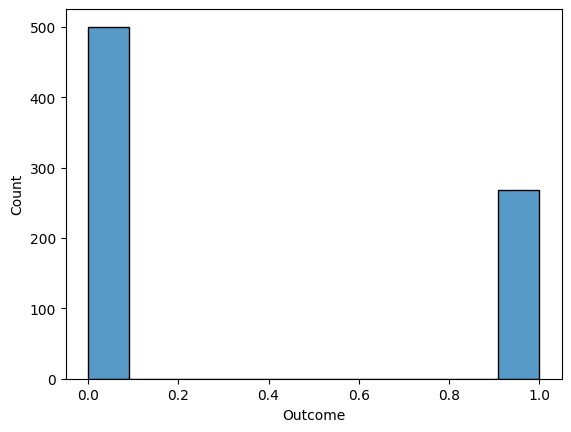

In [6]:
sns.histplot(df['Outcome'])

# Verificacion de correlacion

In [7]:
print("No of zero in Glucose ",df['Glucose'].isin([0]).sum())
print("No of zero in BloodPressure ",df['BloodPressure'].isin([0]).sum())
#print("No of zero in SkinThickness ",df['SkinThickness'].isin([0]).sum())
print("No of zero in Insulin ",df['Insulin'].isin([0]).sum())
print("No of zero in BMI ",df['BMI'].isin([0]).sum())

No of zero in Glucose  5
No of zero in BloodPressure  35
No of zero in Insulin  374
No of zero in BMI  11


In [8]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
#df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
#df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,20.536458,79.799479,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,15.952218,115.244002,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Pair Plot   - correlacion entre todas las variables del dataset


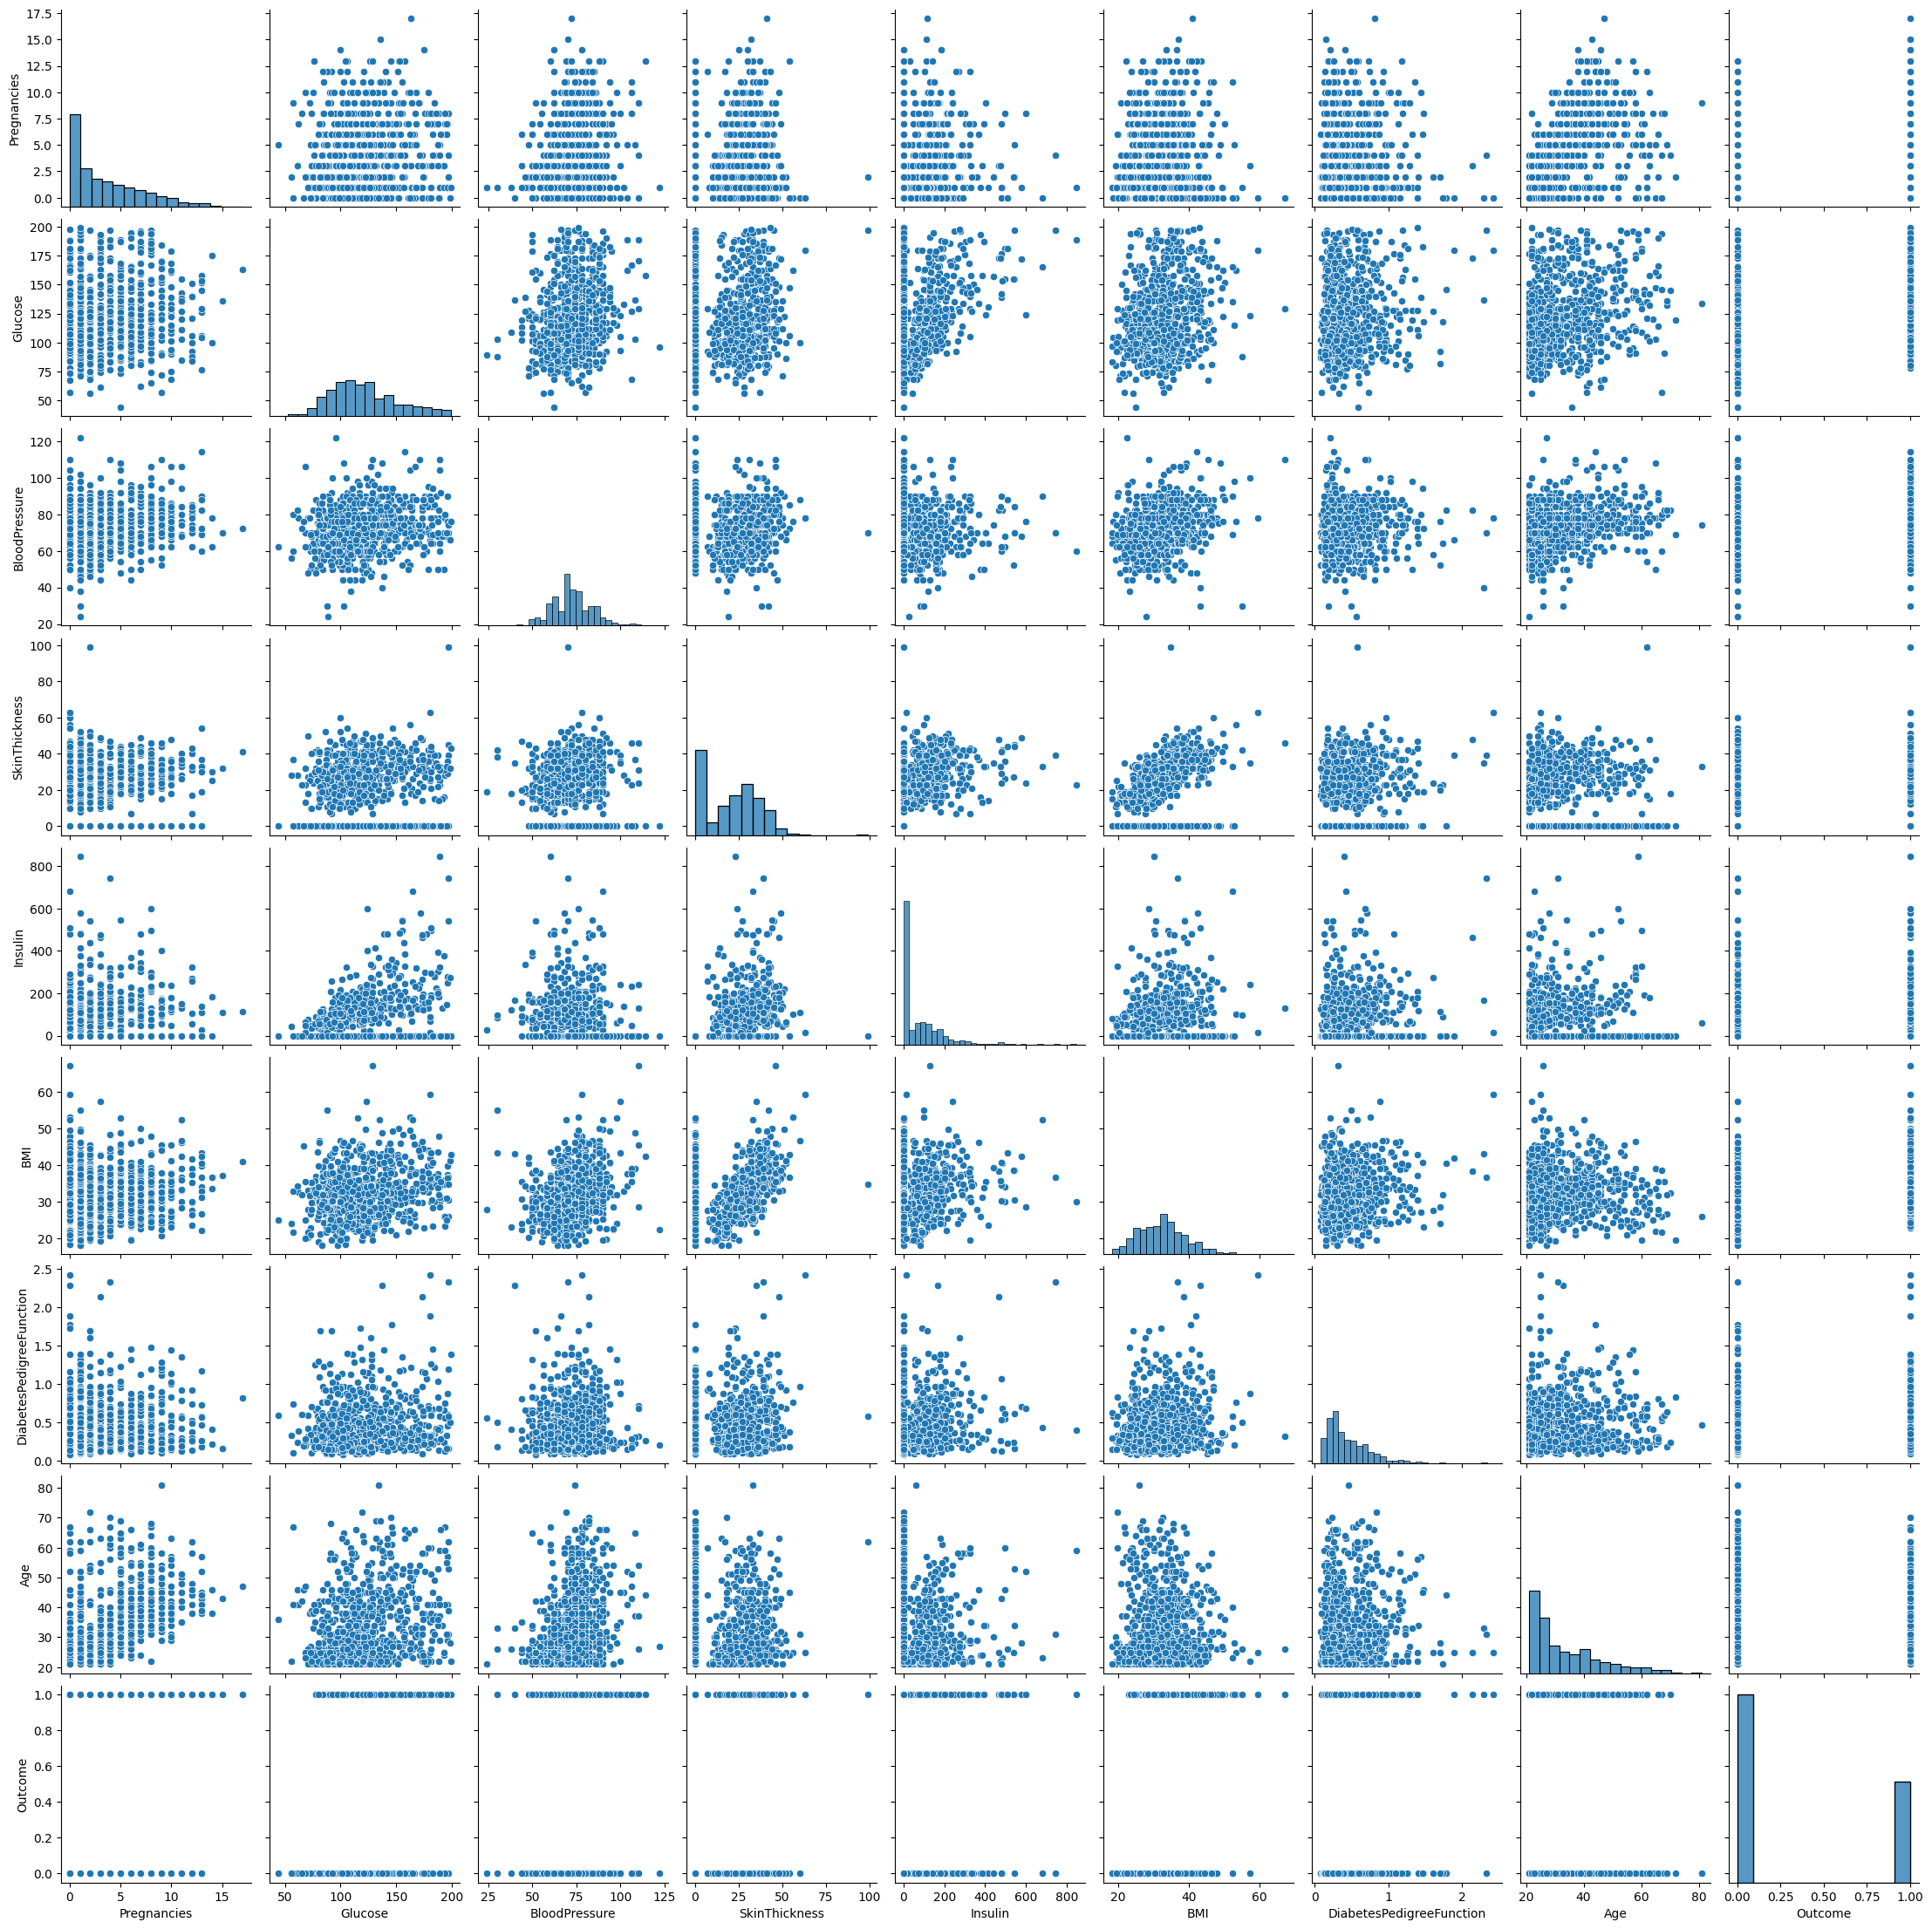

In [10]:
sns.pairplot(df)

<Axes: >

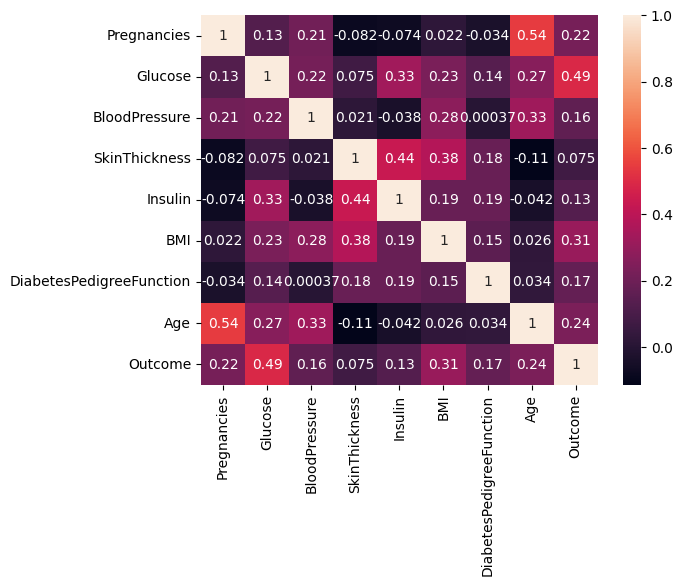

In [11]:
g=df.corr()
sns.heatmap(g,annot=True)

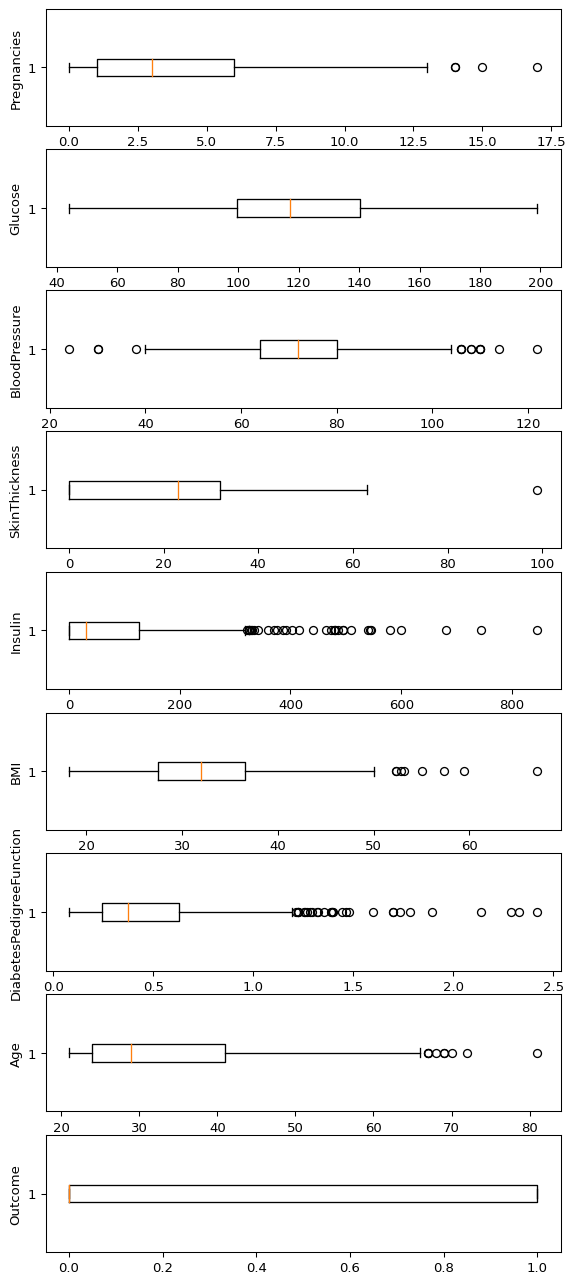

In [12]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

# Aspectos a Evaluar

Debemos de considerar un modelo de regresion lineal, pero antes de debemos de satisfacer lo siguiente:

Linealidad

Independencia

No multicolinearidad

No Outliers

In [13]:
def Modifica_Outliers (dataset,columna):
  q1, q3 = np.percentile(dataset[columna], [25, 75])
  # Calculate the interquartile range
  iqr = q3 - q1
  # Calculate the lower and upper bounds
  lower_limit = q1 - (1.5 * iqr)
  upper_limit = q3 + (1.5 * iqr)

  dataset[columna] = np.where(dataset[columna]>upper_limit,upper_limit,np.where(dataset[columna]<lower_limit,lower_limit,dataset[columna]))
  return (dataset)


df = Modifica_Outliers(df,"Pregnancies")
df = Modifica_Outliers(df,"BloodPressure")
df = Modifica_Outliers(df,"SkinThickness")
df = Modifica_Outliers(df,"BMI")
df = Modifica_Outliers(df,"Age")


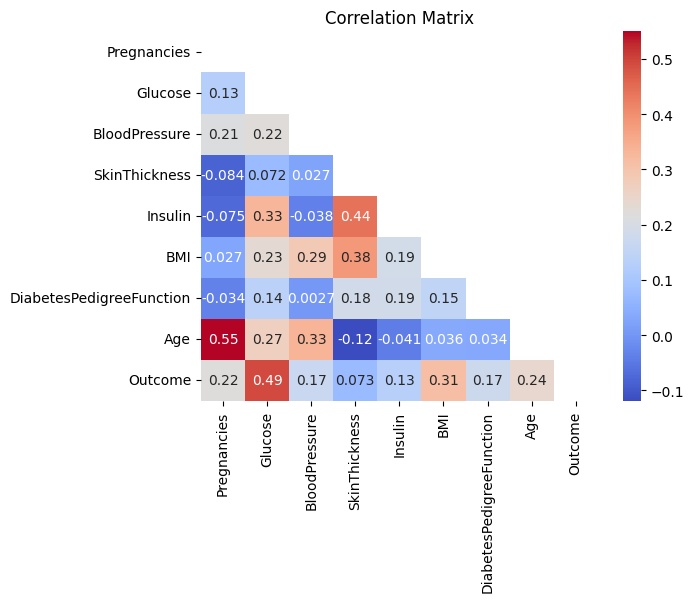

In [14]:
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),cmap='coolwarm',mask=mask,annot=True)
plt.title('Correlation Matrix')
plt.show()

# Findings

De la correlacion de arriba, es claro que existe una correlacion fuerte entre BMI y skinthinkness.

El Outcome (nuestra variable objetivo) esta correlacionada con glucosa y BMI.

No existen correlaciones negativas entre Outcome y otras variables independientes.

Podemos observar alguna correlacion entre edad y bloodpressure e insulina y glucosa.


Text(0.5, 1.0, 'Insulin Vs Glucose')

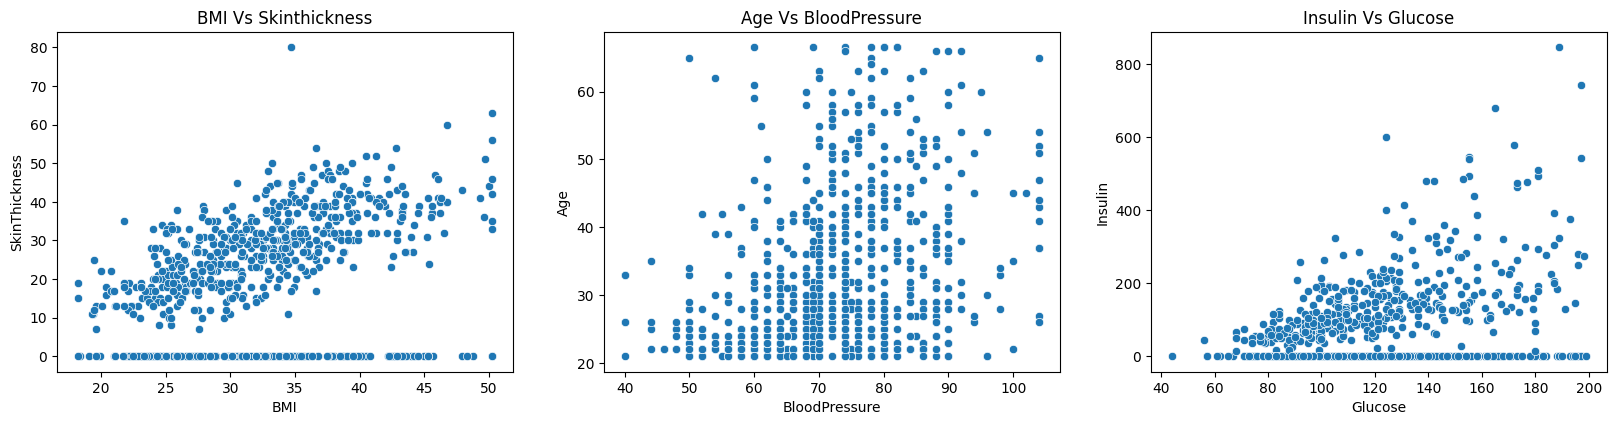

In [15]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.scatterplot(data=df,x="BMI",y="SkinThickness")
plt.title('BMI Vs Skinthickness')
plt.subplot(3,3,2)
sns.scatterplot(data=df,x="BloodPressure",y="Age")
plt.title('Age Vs BloodPressure')
plt.subplot(3,3,3)
sns.scatterplot(data=df,x="Glucose",y="Insulin")
plt.title('Insulin Vs Glucose')

# **Feature selection**

Encontramos una relacion fuerte entre dos variables independientes, (BMI y Skinthickness, pero BMI tiene una relacion fuerte con nuestra variable objetivo, asi que para evitar el principio de no multicolinealidad podemos elimininar skinthickness de nuestro modelo.


In [16]:
df = df.drop("SkinThickness",axis=1)
df = df.drop("DiabetesPedigreeFunction",axis=1)
df = df.drop("Insulin",axis=1)

In [17]:
y = df["Outcome"]
x = df.drop("Outcome",axis=1)

In [18]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=101)
model = LogisticRegression()
model.fit(x_train,y_train)
yhat = model.predict(x_test) #Predicción sobre x_test

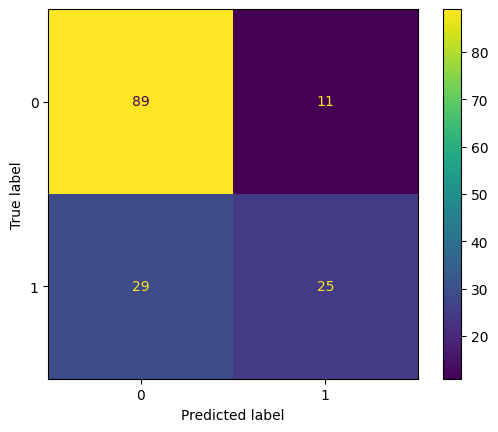

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,yhat)

disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

In [23]:
from sklearn.metrics import f1_score

print('Accury:' ,metrics.accuracy_score(y_test,yhat))
print('Precision: ',metrics.precision_score(y_test,yhat))
print('Recall:' ,metrics.recall_score(y_test,yhat))
print('F1 Score: ',f1_score(y_test,yhat))


Accury: 0.7402597402597403
Precision:  0.6944444444444444
Recall: 0.46296296296296297
F1 Score:  0.5555555555555556
